In [1]:
import sys
sys.path.append("..")

from glob import glob
import matplotlib.pyplot as plt
import ipywidgets as ipw
from IPython.display import Audio
import numpy as np
import pickle
import yaml

from lib.notebooks import plot_groups_metrics
from imitative_agent import ImitativeAgent

In [2]:
agents_path = glob("../out/imitative_agent/scaling/*/")
agents_path.sort()

In [4]:
groups_metrics = {}

for agent_path in agents_path:
    agent = ImitativeAgent.reload(agent_path, load_nn=False)
    config = agent.config
    with open("%s/metrics.pickle" % agent_path, "rb") as f:
        metrics = pickle.load(f)
    
    if config['training']['jerk_loss_weight'] != 1:
        continue
    
    group_name = "\n".join((
        f"{','.join(config['dataset']['names'])}",
        f"synth_art={agent.synthesizer.config['dataset']['art_type']}",
        f"jerk_c={config['training']['jerk_loss_ceil']}",
        f"jerk_w={config['training']['jerk_loss_weight']}",
        f"bi={config['model']['inverse_model']['bidirectional']}",
    ))
    
    if group_name not in groups_metrics:
        groups_metrics[group_name] = {}
    groups_metrics[group_name][agent_path] = metrics

In [5]:
metrics_name = [
    "direct_model_estimation_error",
    "inverse_model_estimation_error",
    "inverse_model_repetition_error",
    "inverse_model_jerk",
]

def show_metrics(split_name="test"):
    plot_groups_metrics(groups_metrics, metrics_name, split_name)
display(ipw.interactive(show_metrics, split_name=["train", "validation", "test"]))

interactive(children=(Dropdown(description='split_name', index=2, options=('train', 'validation', 'test'), val…

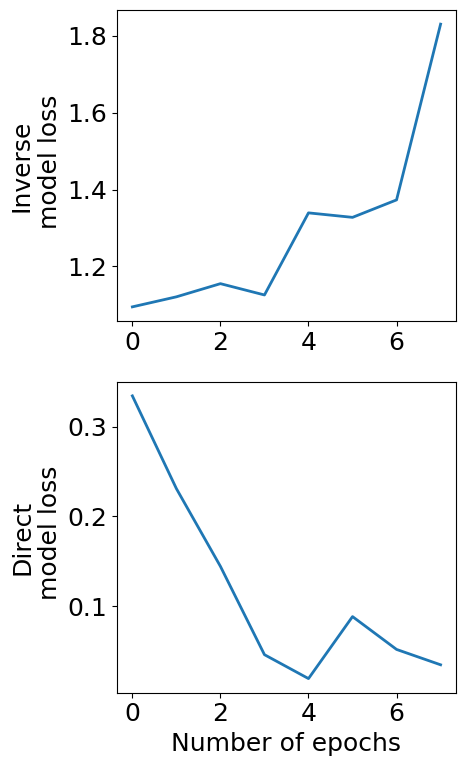

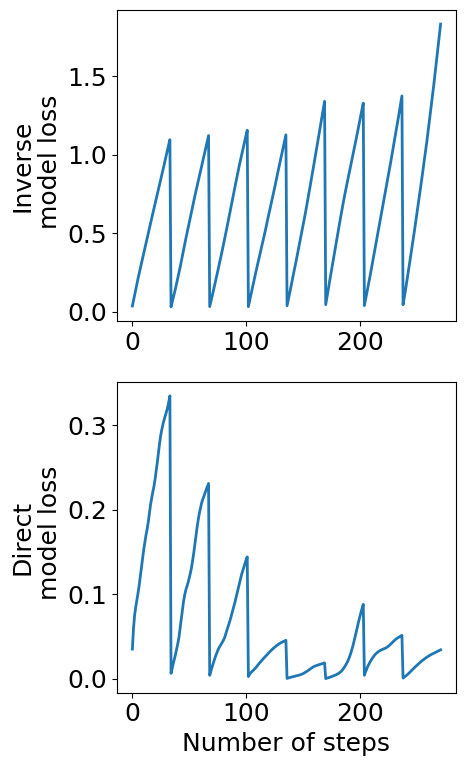

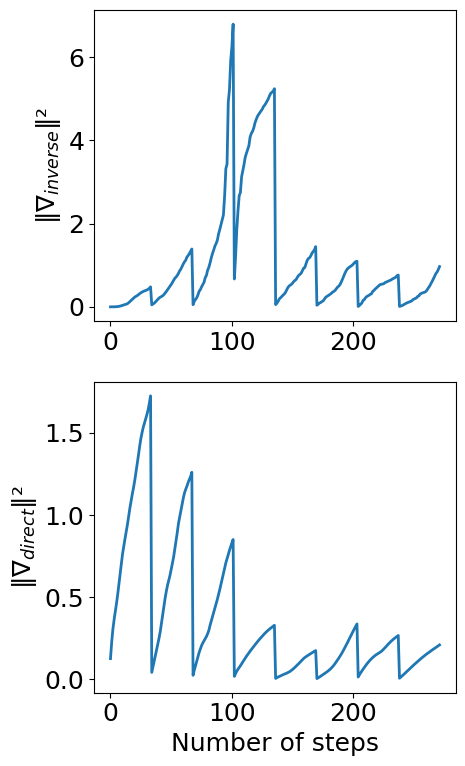

In [51]:
import matplotlib
import pickle
import matplotlib.pyplot as plt
from pathlib import Path
matplotlib.rcParams.update({'font.size': 18, 'lines.linewidth': 2})

#agent_path = Path("../out/imitative_agent/scaling/M0_10_mn_seed_0_with_100_gan")
agent_path = Path("../out/imitative_agent/3e64b74d691e4a025a1da82d32338baa-0")

with open(agent_path / 'metrics.pickle', 'rb') as f:
        metrics = pickle.load(f)

n = 2
if agent_path.name.endswith('with_gan'):
    n = 3
fig, axs = plt.subplots(n, 1, figsize=(5, 8))
axs[0].set_ylabel("Inverse\n model loss")
axs[0].plot(metrics["train"]["inverse_model_repetition_error"])


#axs[0].set_xlim(3,18)
#axs[0].set_ylim(0,4)

axs[1].set_ylabel("Direct\n model loss")
axs[1].plot(metrics["train"]["direct_model_estimation_error"])
#axs[1].set_xlim(3,18)
#axs[1].set_ylim(-0.5,4)

if n == 3:
    axs[2].plot(metrics["train"]['discrimination_accuracy'])
    axs[2].set_ylabel("GAN\n accuracy (%)")
    axs[2].set_xlabel("Number of epochs")
else:
    axs[1].set_xlabel("Number of epochs")
plt.tight_layout()
plt.show()

# Plot step instead of epoch
fig, axs = plt.subplots(n, 1, figsize=(5, 8))
axs[0].set_ylabel("Inverse\n model loss")
axs[0].plot(metrics["train_step"]["inverse_model_repetition_error"])
axs[1].set_ylabel("Direct\n model loss")
axs[1].plot(metrics["train_step"]["direct_model_estimation_error"])
axs[1].set_xlabel('Number of steps')

plt.tight_layout()
#plt.savefig(agent_path.parent / f'M0_600_mn_losses_with.png')
plt.show()

# Plot gradient norm

fig, axs = plt.subplots(n, 1, figsize=(5, 8))
axs[0].set_ylabel(r'$\|\nabla_{inverse}\|²$')
axs[0].plot(metrics["train_step"]["inverse_gradient_norm"])
axs[1].set_ylabel(r'$\|\nabla_{direct}\|²$')
axs[1].plot(metrics["train_step"]["direct_gradient_norm"])
axs[1].set_xlabel('Number of steps')
plt.tight_layout()

#plt.savefig(agent_path.parent / f'M0_600_mn_grad_norm.png')
plt.show()



#plt.savefig(agent_path.parent / f'{agent_path.name}_losses.png', dpi=300)